In [2]:
import h5py
import numpy as np
import pandas as pd
import hdf5plugin
import os
import matplotlib.pyplot as plt
import glob
import xarray as xr

def seconds_to_datetime(seconds, ref="1900-01-01"):
    """from seconds to datetime64"""
    seconds = np.asarray(seconds)
    return pd.to_datetime(seconds, unit="s", origin=ref, errors="coerce")


/srvfs/home/uvoggenberger/.conda/envs/uvn10/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt

from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)



11035
	 107


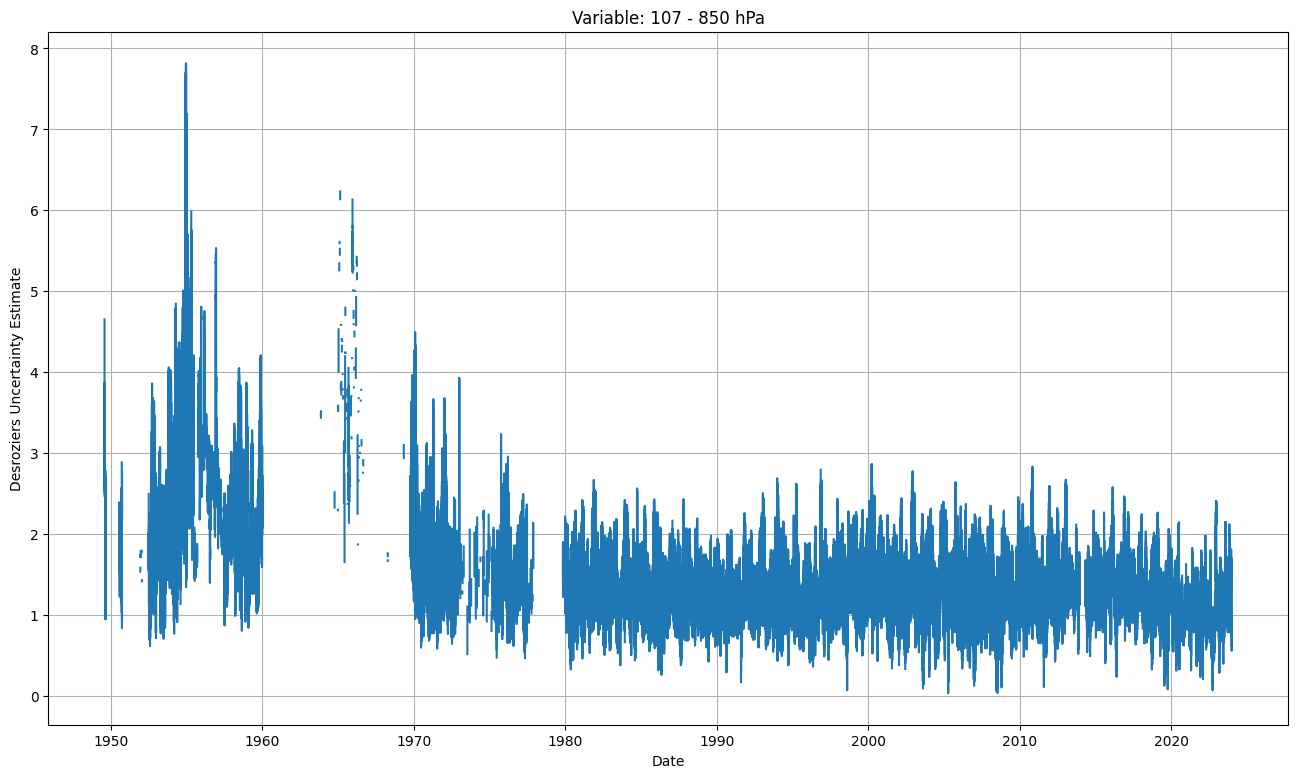

	 117


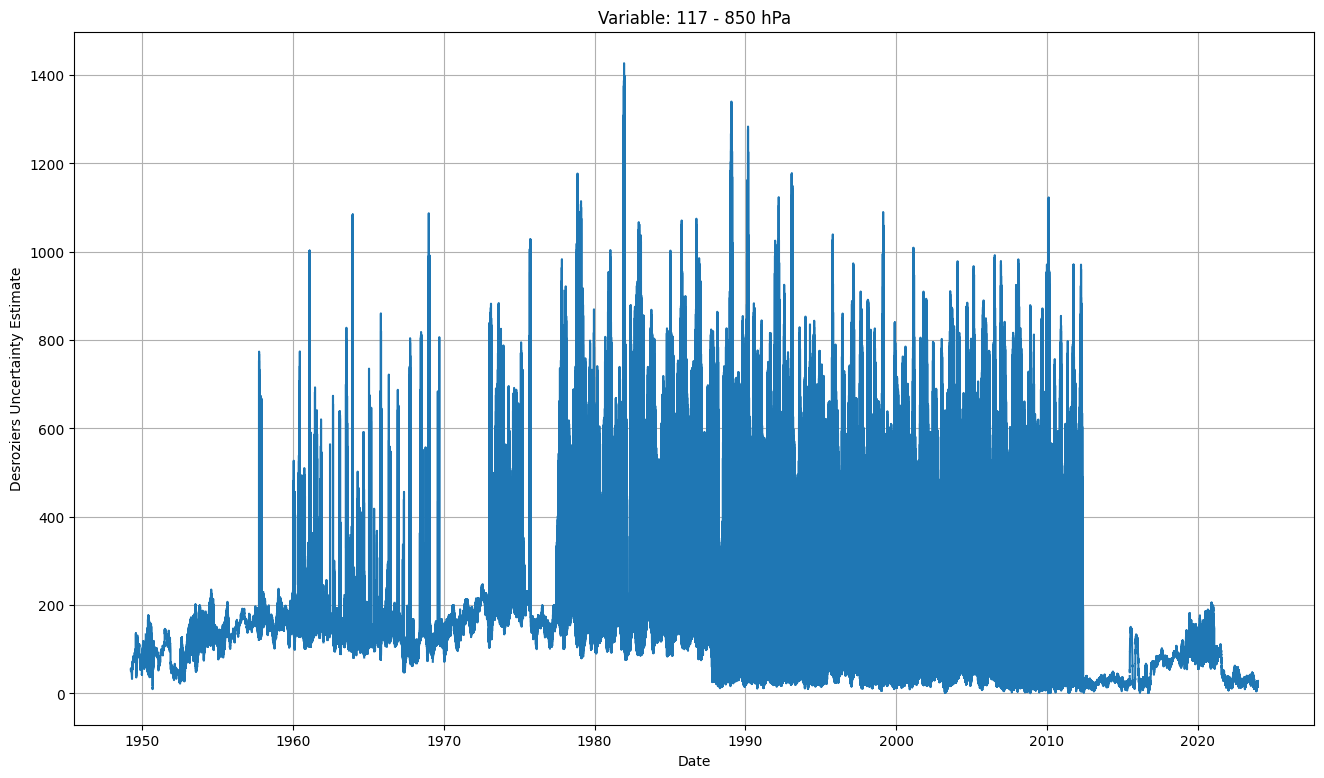

	 126


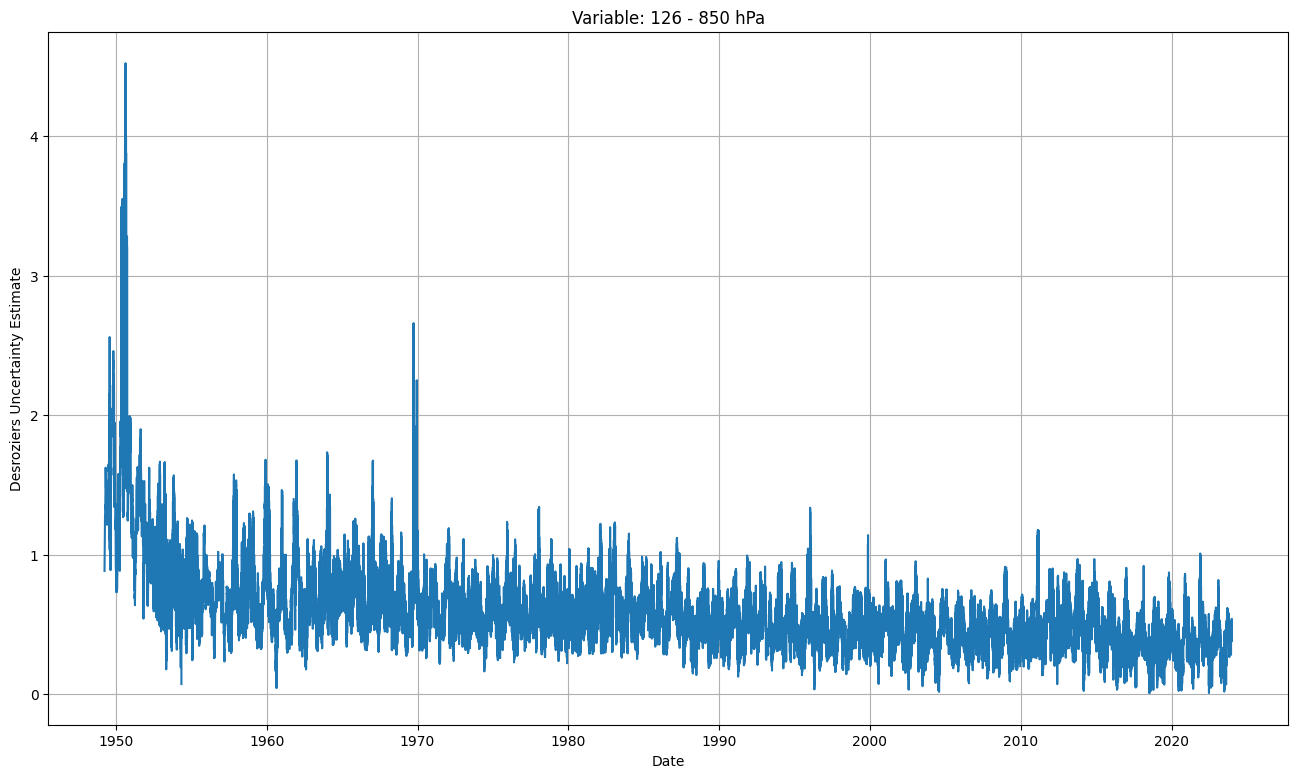

	 138


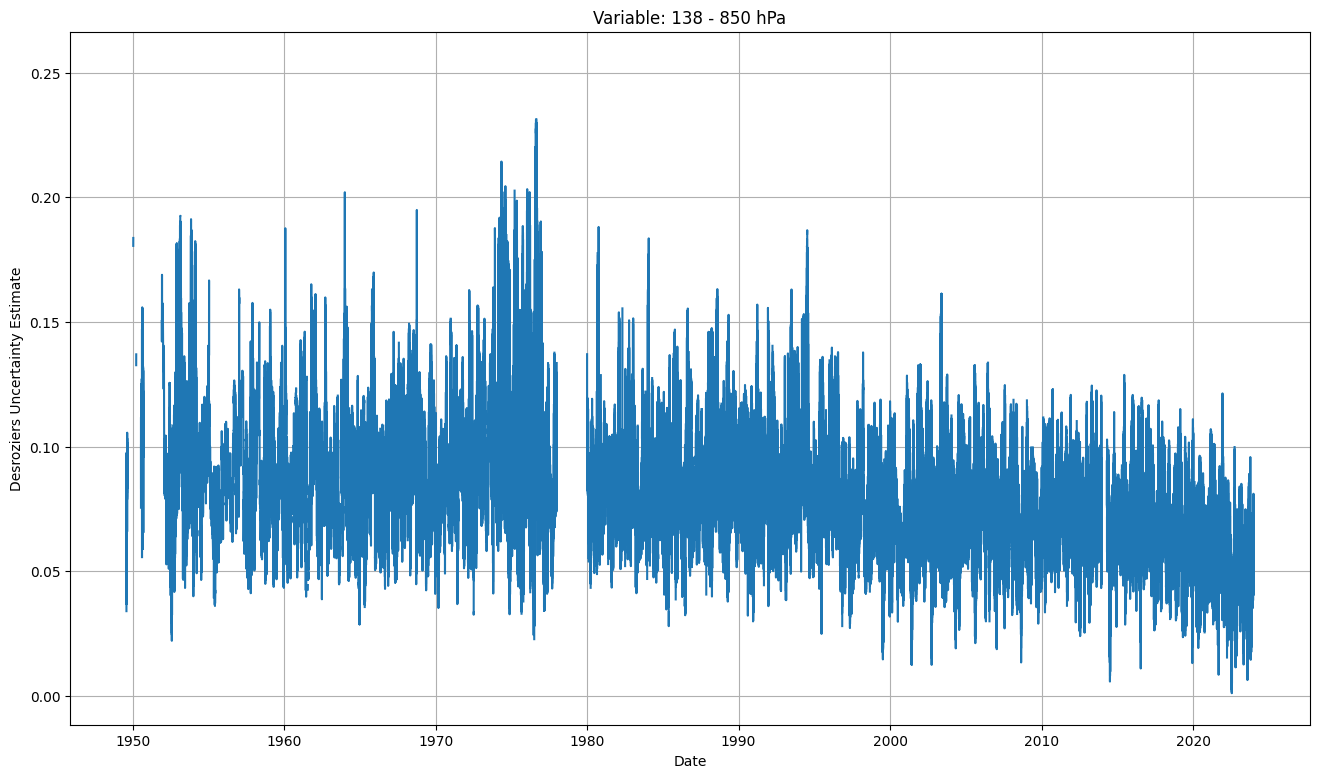

	 139


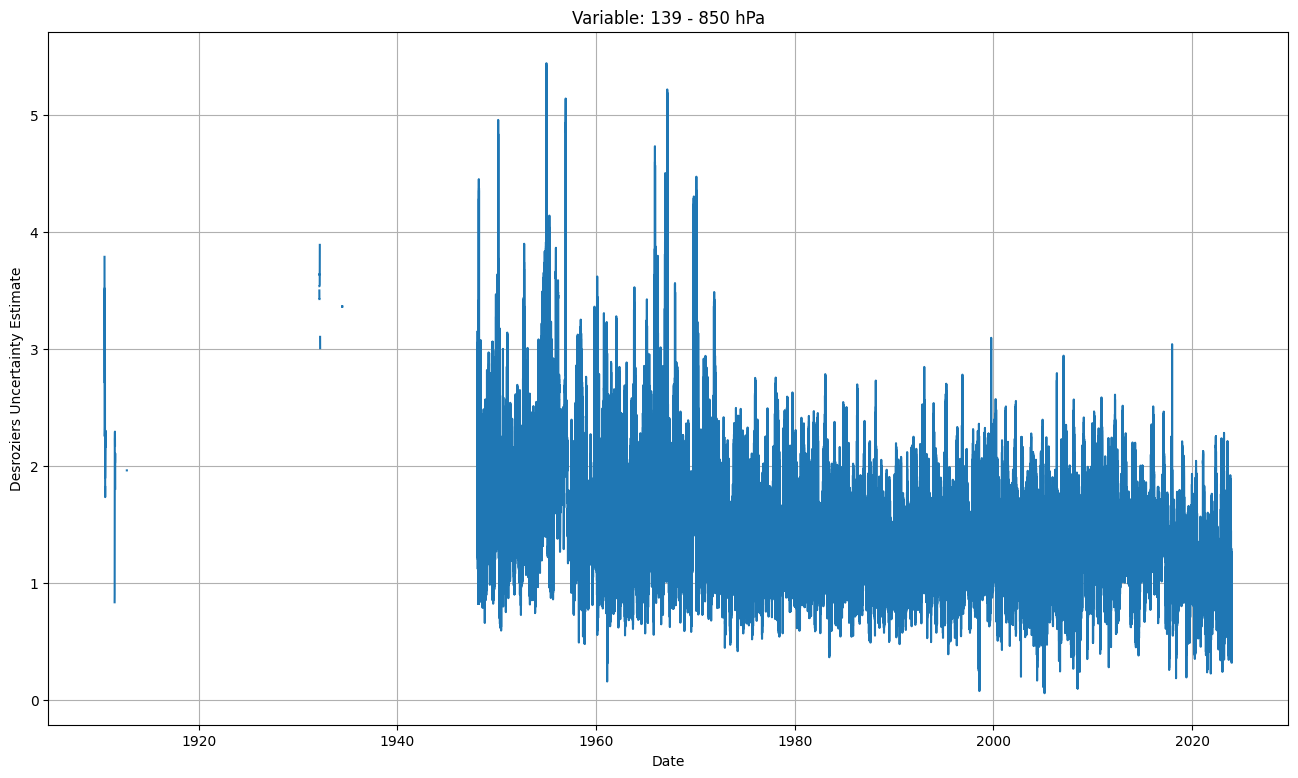

	 140


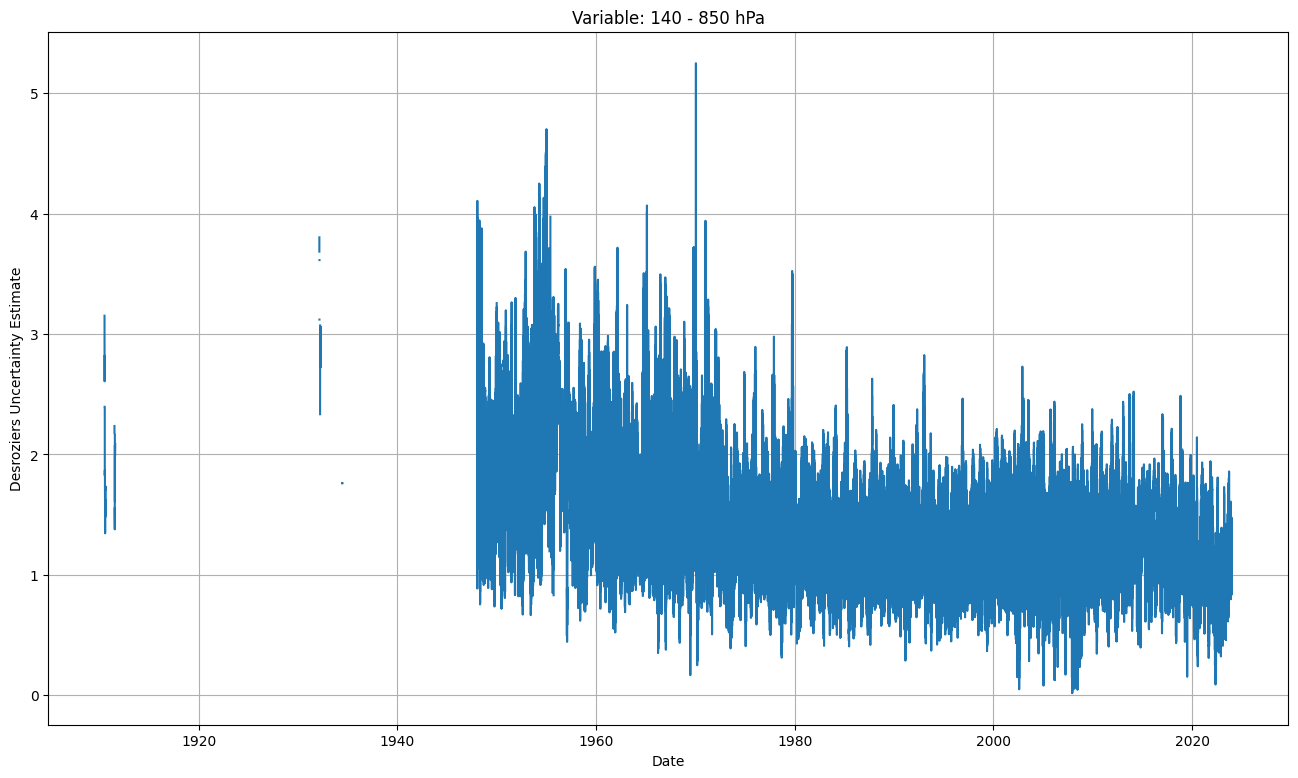

	 39


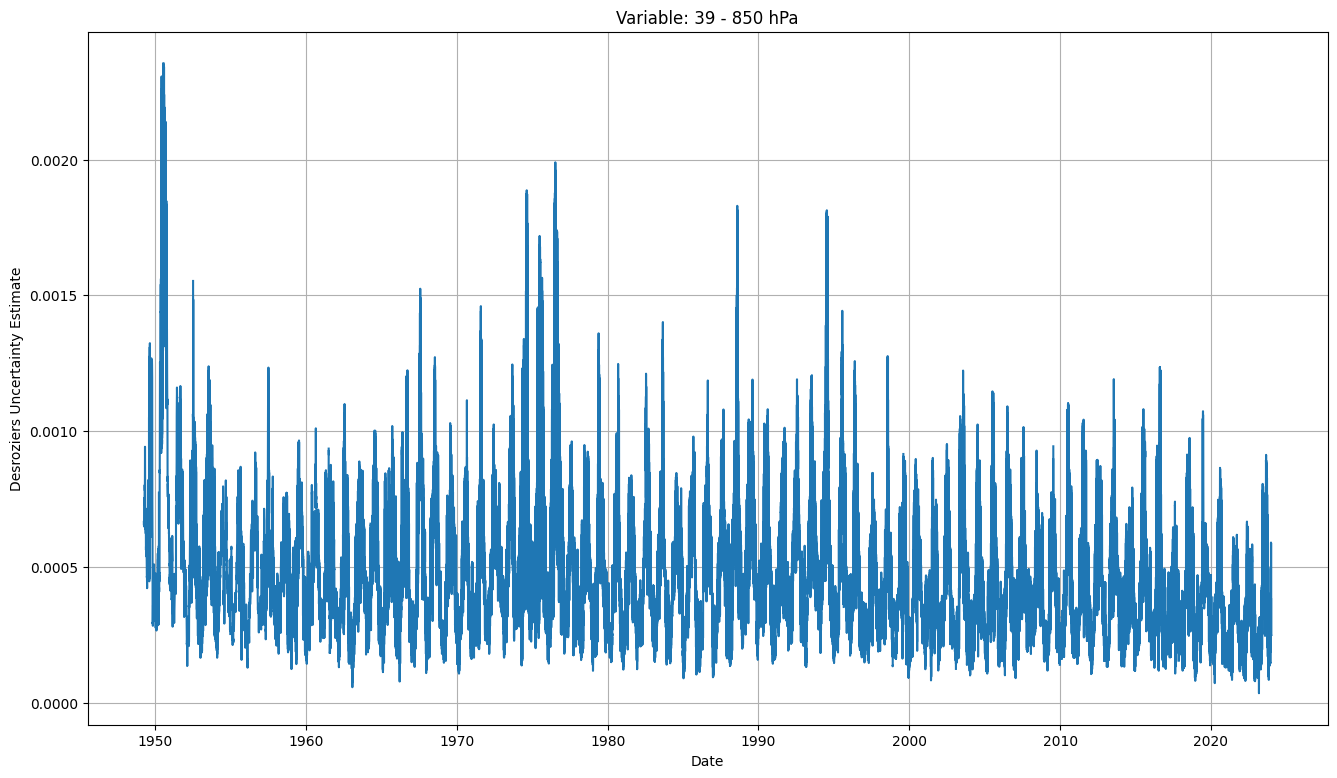

In [4]:
for stat in ['11035',]: # '94510', '67095', '11035', '10393', '72357', '06610'
    print(stat)
    files = glob.glob('/srvfs/scratch/uvoggenberger/DESROZIERS_converted19_long_06AUG2024/*'+ stat +'*')
    source = glob.glob('/mnt/users/scratch/leo/scratch/converted_v19/long/*'+ stat +'*.nc')
    for var in ['106', '107', '117', '126', '137', '138', '139', '140', '34', '39']:
        with h5py.File(source[0], 'r') as data:
            idx = data['recordindices'][var][:]
            temp = data['observations_table']['observation_value'][idx[0]:idx[-1]]
            dt = data['observations_table']['date_time'][idx[0]:idx[-1]]
            pl = data['observations_table']['z_coordinate'][idx[0]:idx[-1]]
            sel_dt = dt[pl == 85000]
        with h5py.File(files[0], 'r') as deso:
            unc = deso['advanced_uncertainty']['desroziers_30'][idx[0]:idx[-1]]
            sel_unc = unc[pl == 85000]

        au = np.array(unc)
        if len(au[~ np.isnan(au)]) > 0:
            print('\t', var)
            plt.plot(seconds_to_datetime(sel_dt), sel_unc)
            plt.ylabel('Desroziers Uncertainty Estimate' )
            plt.xlabel('Date')

            plt.title('Variable: ' + str(var) + ' - 850 hPa')
            plt.grid()
            plt.show()
            plt.close()

11035
	 107


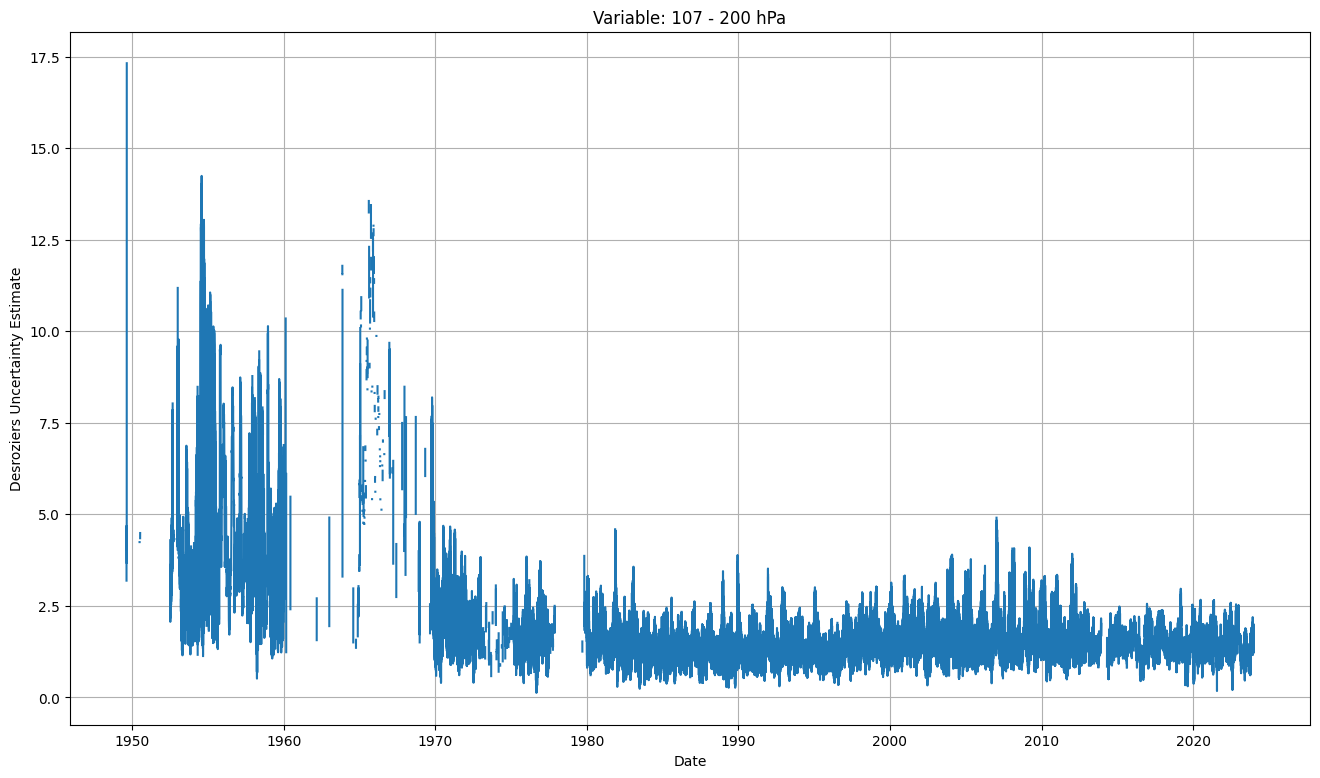

	 117


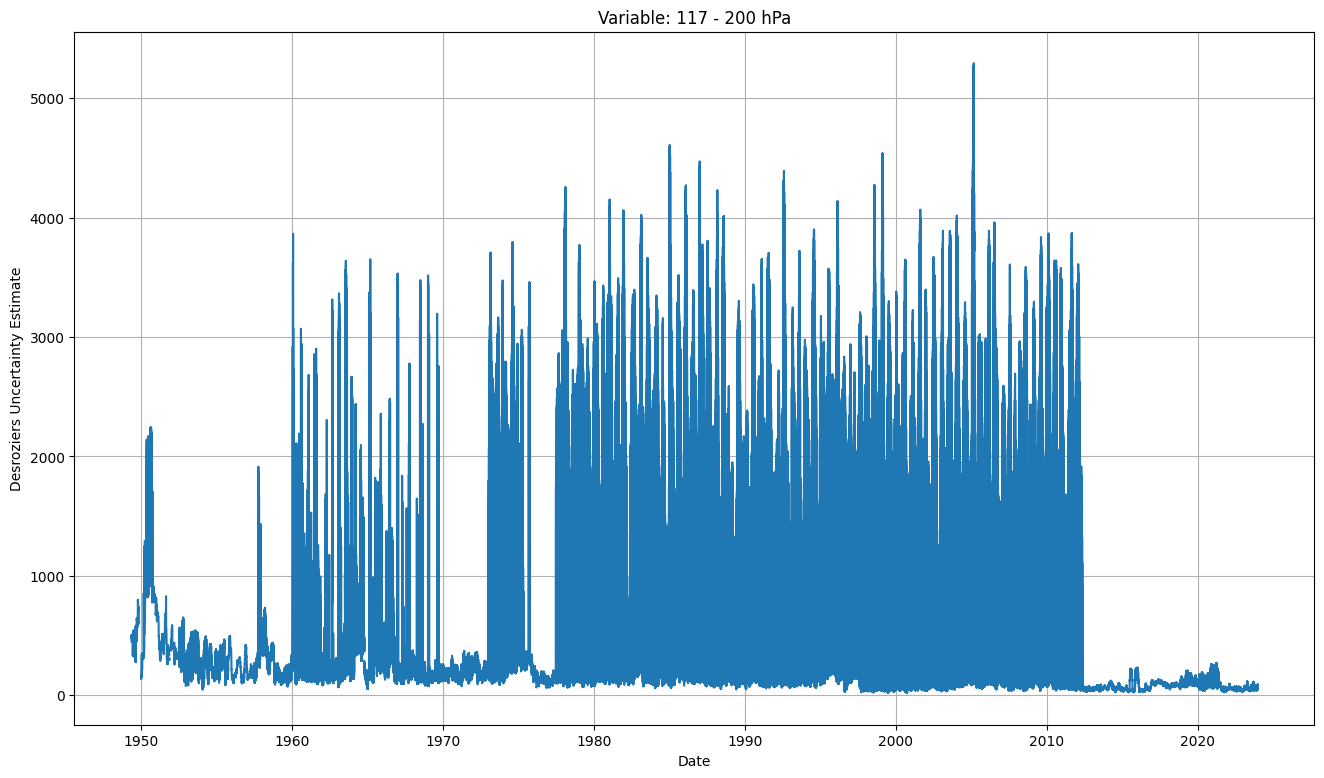

	 126


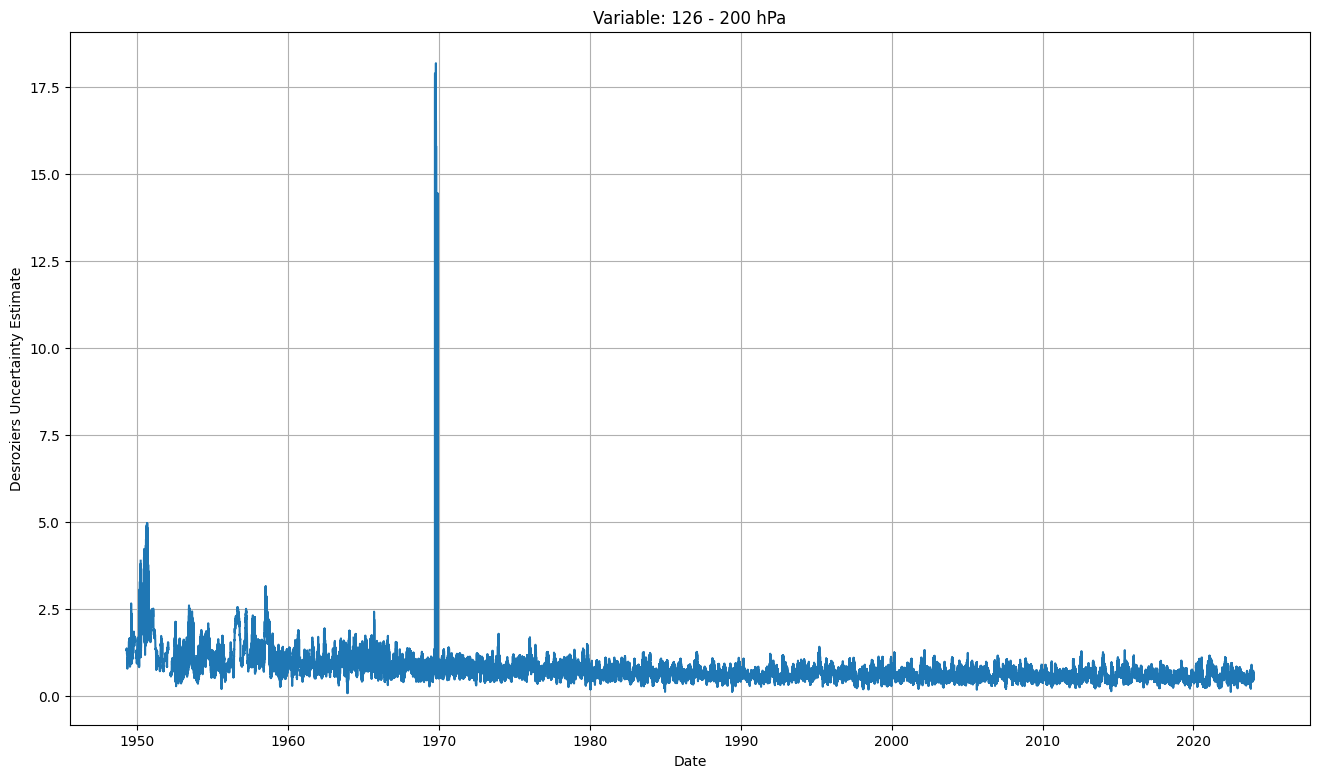

	 138


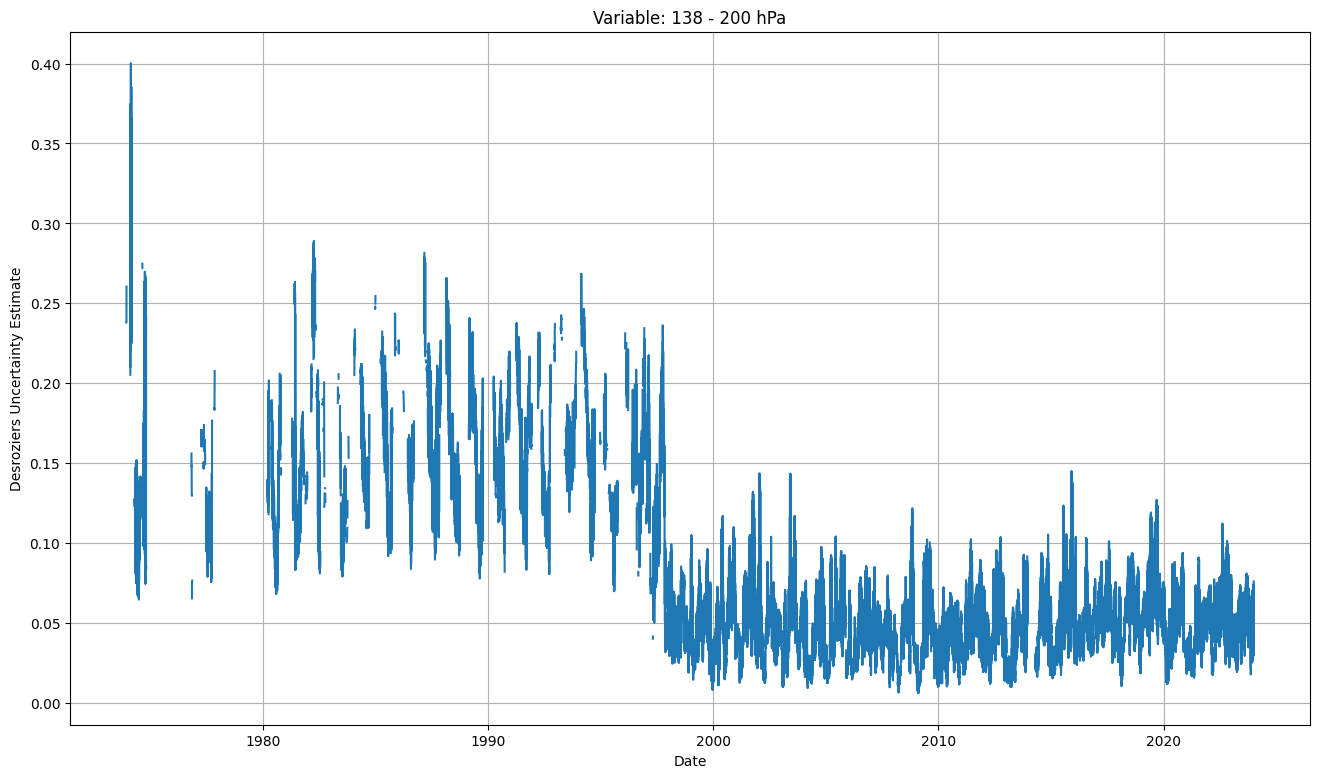

	 139


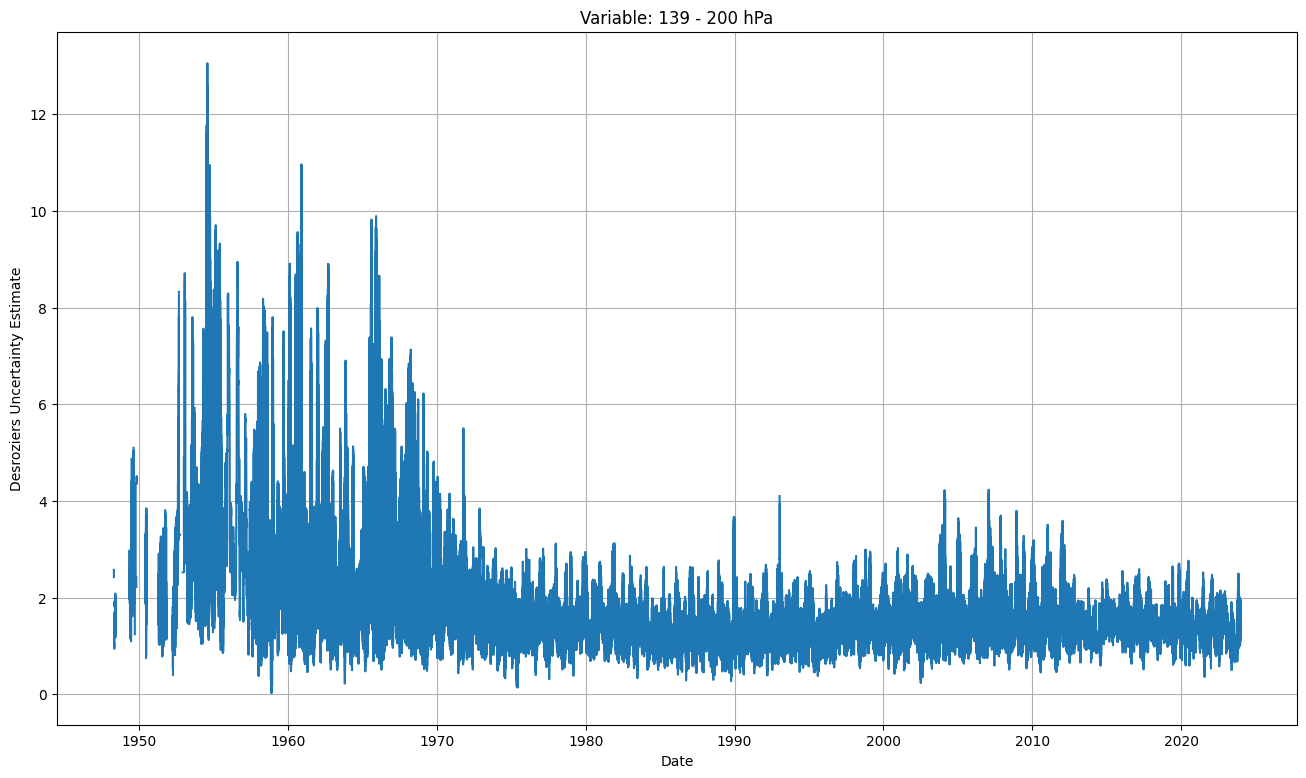

	 140


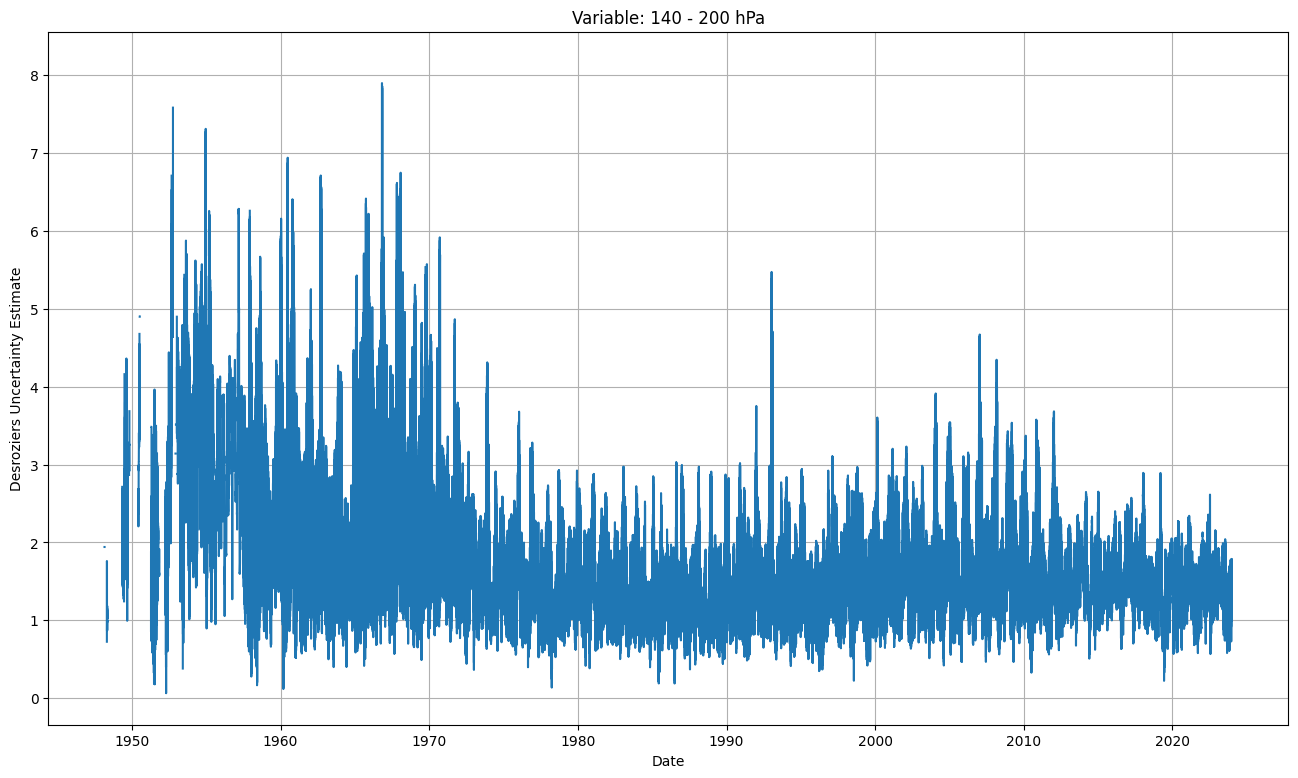

	 39


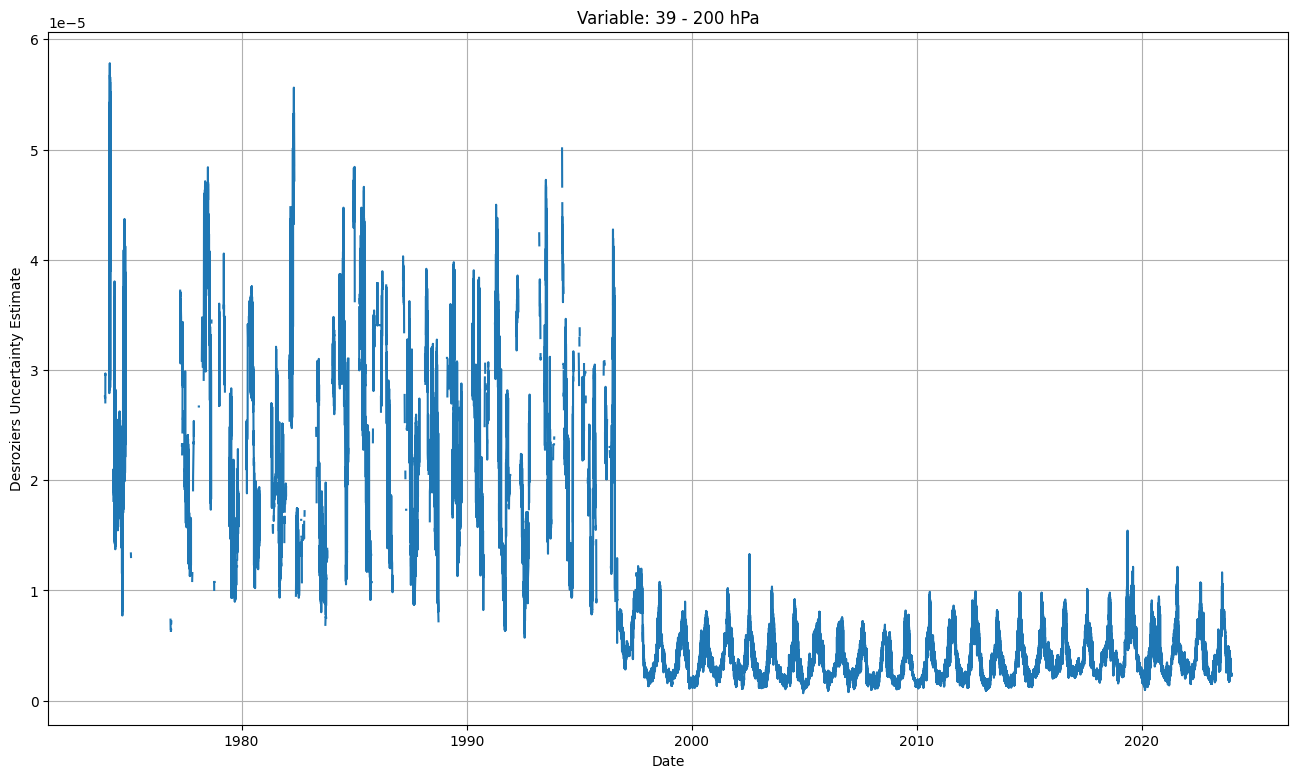

In [6]:
for stat in ['11035',]: # '94510', '67095', '11035', '10393', '72357', '06610'
    print(stat)
    files = glob.glob('/srvfs/scratch/uvoggenberger/DESROZIERS_converted19_long_06AUG2024/*'+ stat +'*')
    source = glob.glob('/mnt/users/scratch/leo/scratch/converted_v19/long/*'+ stat +'*.nc')
    for var in ['106', '107', '117', '126', '137', '138', '139', '140', '34', '39']:
        with h5py.File(source[0], 'r') as data:
            idx = data['recordindices'][var][:]
            temp = data['observations_table']['observation_value'][idx[0]:idx[-1]]
            dt = data['observations_table']['date_time'][idx[0]:idx[-1]]
            pl = data['observations_table']['z_coordinate'][idx[0]:idx[-1]]
            sel_dt = dt[pl == 20000]
        with h5py.File(files[0], 'r') as deso:
            unc = deso['advanced_uncertainty']['desroziers_30'][idx[0]:idx[-1]]
            sel_unc = unc[pl == 20000]

        au = np.array(unc)
        if len(au[~ np.isnan(au)]) > 0:
            print('\t', var)
            plt.plot(seconds_to_datetime(sel_dt), sel_unc)
            plt.ylabel('Desroziers Uncertainty Estimate' )
            plt.xlabel('Date')

            plt.title('Variable: ' + str(var) + ' - 200 hPa')
            plt.grid()
            plt.show()
            plt.close()